<a href="https://colab.research.google.com/github/sarasabino/Accident_Rate_Project/blob/main/Src/Notebooks/02_Exploratory_Staff_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploratory Staff data

We are going to read all data we have on the staff data file. We are going to generate six df with the following data:

- employees_country --> number of employees per year and country
- int_empl_gender --> nº employees per year, country and gender
- int_empl_age --> nº employees per year, age range and gender
- int_empl_category --> nº employees per year, catgeory and gender
- ext_empl_genero --> nº employees per year and gender
- h_formacion --> nº trainning hours received by the employees per year and country

In [146]:
! cp /content/drive/MyDrive/'Colab Notebooks'/'TFM Accidentabilidad'/Data/Datos_plantilla.xlsx .

In [147]:
import pandas as pd

employees_country = pd.read_excel('Datos_plantilla.xlsx',sheet_name='tipo_empleados_pais')
employees_country.head()

,Año,País,Tipo contrato,Empleados
0,2018,México,Interno,154
1,2018,México,Externo,61
2,2018,EEUU,Interno,105
3,2018,EEUU,Externo,0
4,2018,Colombia,Interno,243


In [148]:
int_empl_gender = pd.read_excel('Datos_plantilla.xlsx',sheet_name='int_genero')
int_empl_gender.head()

,Año,País,Hombres,Mujeres
0,2018,Alemania,379,67
1,2018,Argentina,56,10
2,2018,Bégica,0,0
3,2018,Brasil,270,58
4,2018,China,256,49


In [149]:
int_empl_age = pd.read_excel('Datos_plantilla.xlsx',sheet_name='int_edad')
int_empl_age.head()

,Año,Rango edad,Hombres,Mujeres
0,2018,<30,1160,139
1,2018,30-50,2551,504
2,2018,>50,993,112
3,2019,<30,786,147
4,2019,30-50,1883,400


In [150]:
int_empl_category = pd.read_excel('Datos_plantilla.xlsx',sheet_name='int_categoria')
int_empl_category.head()


,Año,Categoria_laboral,Hombres,Mujeres
0,2018,Director,110,10
1,2018,Mando intermedio,541,122
2,2018,Personal planta,4133,1378
3,2019,Director,147,25
4,2019,Mando intermedio,497,122


In [151]:
ext_empl_genero = pd.read_excel('Datos_plantilla.xlsx',sheet_name='ext_genero')

ext_empl_genero.head()


,Año,Hombres,Mujeres
0,2018,787,53
1,2019,685,30
2,2017,496,75


In [152]:
h_formacion = pd.read_excel('Datos_plantilla.xlsx',sheet_name='h_formacion')
h_formacion.head()

,Año,Pais,Horas formacion
0,2018,Alemania,10043
1,2018,Argentina,0
2,2018,Bégica,0
3,2018,Brasil,13680
4,2018,China,10625


In [153]:
employees_country.head()

,Año,País,Tipo contrato,Empleados
0,2018,México,Interno,154
1,2018,México,Externo,61
2,2018,EEUU,Interno,105
3,2018,EEUU,Externo,0
4,2018,Colombia,Interno,243


In [154]:
empl_country_total = employees_country.groupby(['Año', 'País']).agg('sum')
empl_country_total = empl_country_total.reset_index()

empl_country_total.head()

,Año,País,Empleados
0,2017,Alemania,197
1,2017,Argentina,55
2,2017,Brasil,360
3,2017,China,245
4,2017,Colombia,255


In [155]:
empl_country_total = empl_country_total[empl_country_total['País']!='Total'] #we have a country called 'total' for 2017 as we dont have the detail

In [156]:
empl_country_total = empl_country_total.sort_values('Empleados', ascending=False)

In [157]:
x = empl_country_total[empl_country_total['Año'] == 2017]['País'].astype(str)
y = empl_country_total[empl_country_total['Año'] == 2017]['Empleados'].astype(int)

In [158]:
x2 = empl_country_total[empl_country_total['Año'] == 2018]['País']
y2 = empl_country_total[empl_country_total['Año'] == 2018]['Empleados']


x3 = empl_country_total[empl_country_total['Año'] == 2019]['País']
y3 = empl_country_total[empl_country_total['Año'] == 2019]['Empleados']

Text(0.5, 1.0, 'Nº employees 2019')

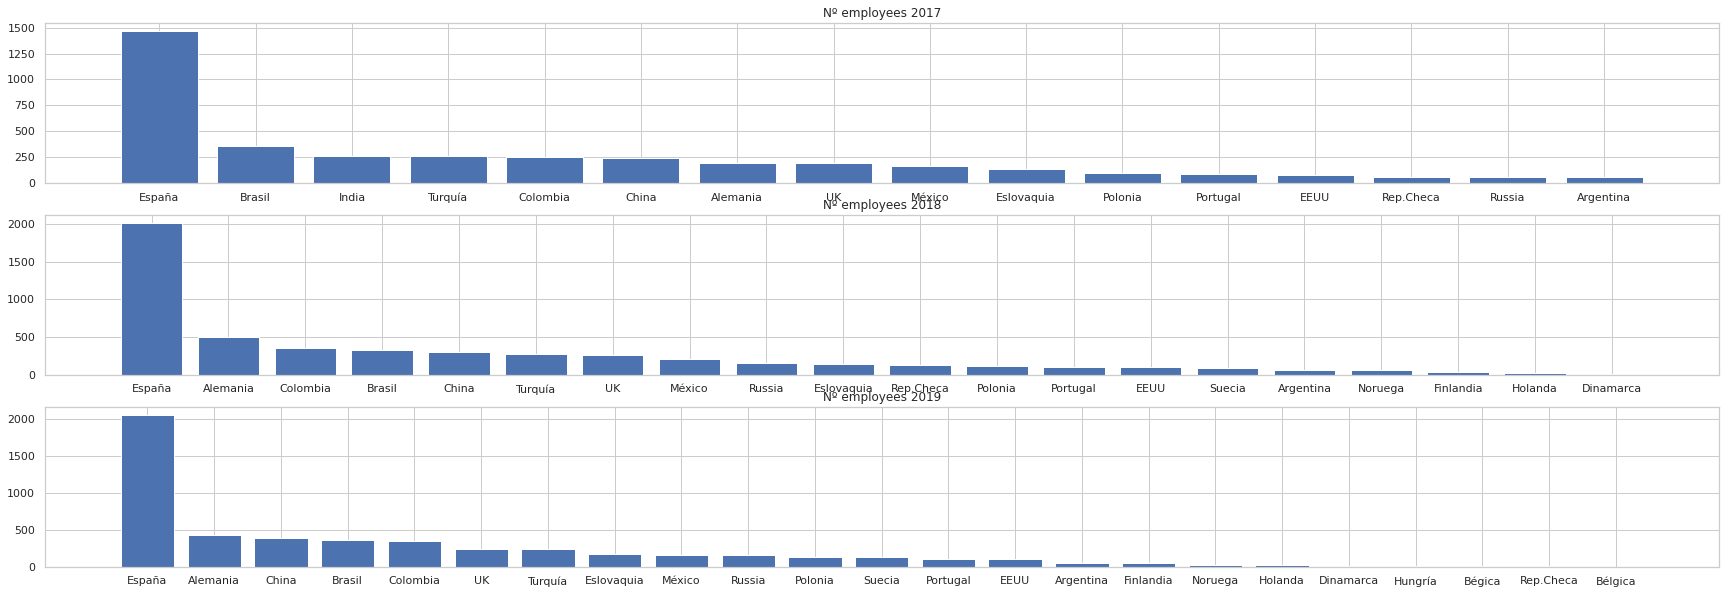

In [159]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 1, figsize=(30,10))



axs[0].bar(x, y)
axs[0].set_title('Nº employees 2017')


axs[1].bar(x2, y2)
axs[1].set_title('Nº employees 2018')


axs[2].bar(x3, y3)
axs[2].set_title('Nº employees 2019')

we are going to calculate the total number of employees per year

In [160]:
total_employees = pd.read_excel('Datos_plantilla.xlsx',sheet_name='tipo_empleados_pais')
total_employees.head()

,Año,País,Tipo contrato,Empleados
0,2018,México,Interno,154
1,2018,México,Externo,61
2,2018,EEUU,Interno,105
3,2018,EEUU,Externo,0
4,2018,Colombia,Interno,243


In [161]:
total_employees = total_employees.groupby('Año').agg(sum)

In [162]:
total_employees

,Empleados
Año,
2017,4872
2018,5357
2019,5268


In [163]:
total_employees = total_employees.reset_index()
total_employees['Año'] = total_employees['Año'].astype(str)

The amount of employees has been increasing during past years

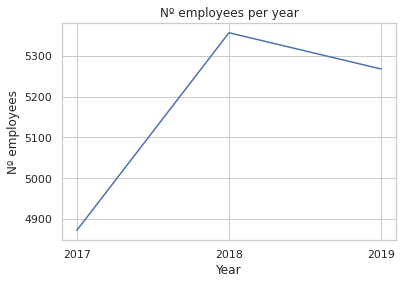

In [164]:
import matplotlib.pyplot as plt

plt.plot(total_employees['Año'], total_employees['Empleados'])
plt.title('Nº employees per year')
plt.xlabel('Year')
plt.ylabel('Nº employees')

plt.show()

### Staff by country and gender

In [165]:
int_empl_gender.head()

,Año,País,Hombres,Mujeres
0,2018,Alemania,379,67
1,2018,Argentina,56,10
2,2018,Bégica,0,0
3,2018,Brasil,270,58
4,2018,China,256,49


In [166]:
staff_gender= int_empl_gender.groupby('Año').agg('sum')

In [167]:
staff_gender.head()

,Hombres,Mujeres
Año,,
2017,3065,448
2018,4370,680
2019,3894,666


In [168]:
staff_gender_t = staff_gender.T
staff_gender_t= staff_gender_t.reset_index()
staff_gender_t

Año,index,2017,2018,2019
0,Hombres,3065,4370,3894
1,Mujeres,448,680,666


The % of womens in the company is a minority , men are in all years almost the 90% of the company's staff

Text(0.5, 1.0, 'Nº employees by gender 2019')

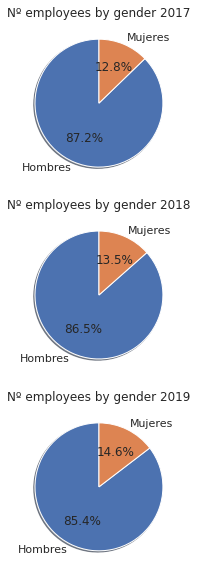

In [169]:
fig, axs = plt.subplots(3, 1, figsize=(15,10))



axs[0].pie(staff_gender_t[2017], labels=staff_gender_t['index'],autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[0].set_title('Nº employees by gender 2017')

axs[1].pie(staff_gender_t[2018], labels=staff_gender_t['index'],autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[1].set_title('Nº employees by gender 2018')

axs[2].pie(staff_gender_t[2019], labels=staff_gender_t['index'], autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[2].set_title('Nº employees by gender 2019')

In [170]:
int_empl_gender.head()

,Año,País,Hombres,Mujeres
0,2018,Alemania,379,67
1,2018,Argentina,56,10
2,2018,Bégica,0,0
3,2018,Brasil,270,58
4,2018,China,256,49


In [171]:
#we transform our df so we can plot gender as serie of the chart
df_melted = int_empl_gender.melt(["Año", 'País'],var_name="Gender",value_name="Count")
df_melted.head()

,Año,País,Gender,Count
0,2018,Alemania,Hombres,379
1,2018,Argentina,Hombres,56
2,2018,Bégica,Hombres,0
3,2018,Brasil,Hombres,270
4,2018,China,Hombres,256


In [172]:
df_2017 = df_melted[df_melted['Año']==2017]
df_2018 = df_melted[df_melted['Año']==2018]
df_2019 = df_melted[df_melted['Año']==2019]

On the charts below we can clearly see the notable difference between man and wome. The country with more workers is Spain in all years

Text(0.5, 1.0, 'Nº employees by gender and country in 2017')

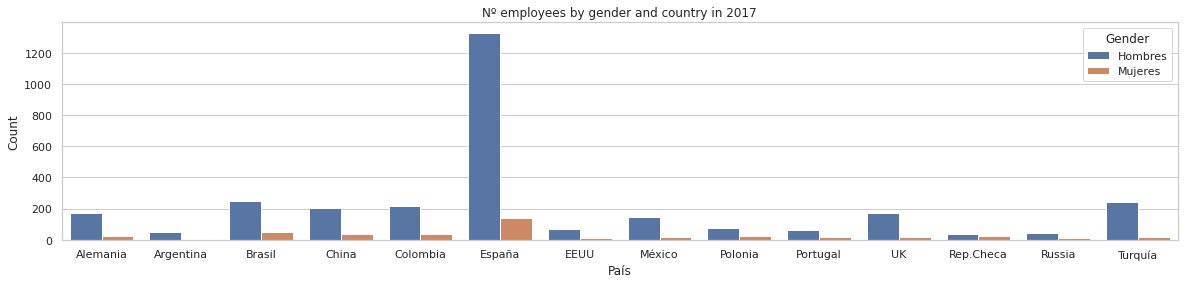

In [173]:
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20,4))

ax = sns.barplot(x="País", y="Count",hue='Gender', data=df_2017)
ax.set_title('Nº employees by gender and country in 2017')


Text(0.5, 1.0, 'Nº employees by gender and country in 2018')

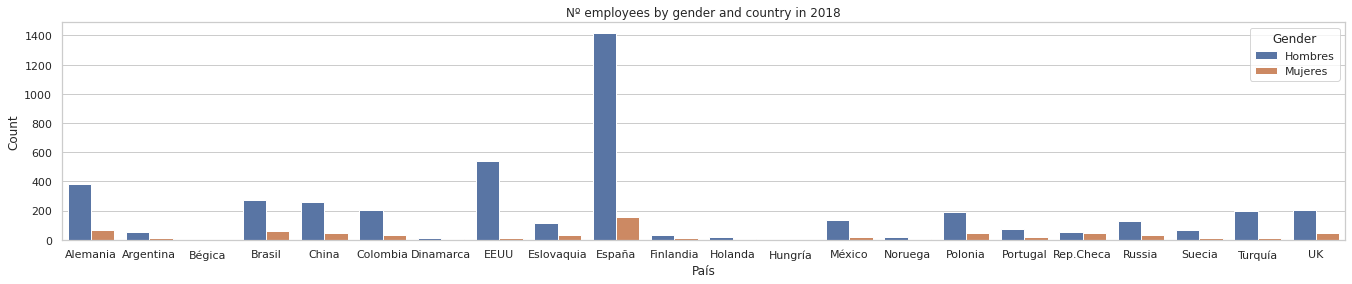

In [174]:
plt.figure(figsize=(23,4))

ax = sns.barplot(x="País", y="Count",hue='Gender', data=df_2018)
ax.set_title('Nº employees by gender and country in 2018')

Text(0.5, 1.0, 'Nº employees by gender and country in 2019')

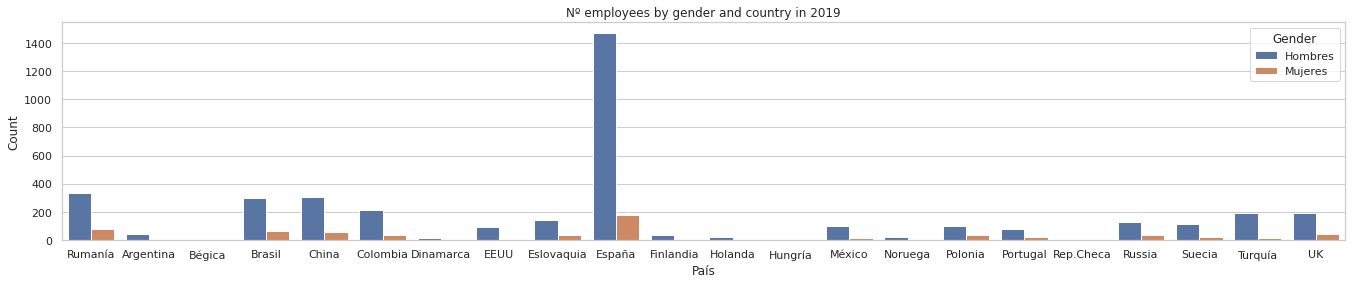

In [175]:
plt.figure(figsize=(23,4))

ax = sns.barplot(x="País", y="Count",hue='Gender', data=df_2019)
ax.set_title('Nº employees by gender and country in 2019')

### Analyzing the company's staff by age

In [176]:
int_empl_age['Total'] = int_empl_age['Hombres'] + int_empl_age['Mujeres']
int_empl_age.head()

,Año,Rango edad,Hombres,Mujeres,Total
0,2018,<30,1160,139,1299
1,2018,30-50,2551,504,3055
2,2018,>50,993,112,1105
3,2019,<30,786,147,933
4,2019,30-50,1883,400,2283


Between 30-50 years is the predominant age of the companies workers. At this point of the analysis we have a type profile of worker: men, between 30-50 years.

Analyzing below charts we can see that the staff is becoming older and the younger employees are minoritary

[Text(0, 0.5, 'Employees'), Text(0.5, 0, 'Age')]

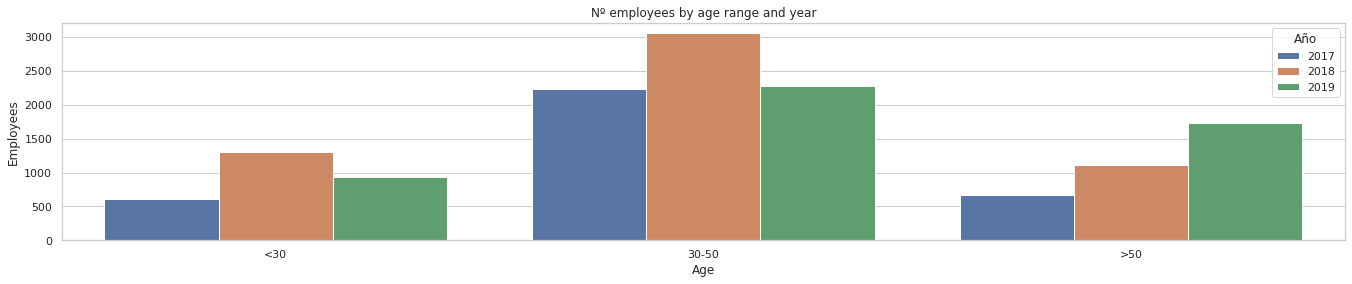

In [177]:
plt.figure(figsize=(23,4))

ax = sns.barplot(x="Rango edad", y="Total",hue='Año', data=int_empl_age)
ax.set_title('Nº employees by age range and year')
ax.set(xlabel='Age', ylabel='Employees')

### Employees by laboral category

In [178]:
int_empl_category['Total'] = int_empl_category['Hombres'] + int_empl_category['Mujeres']

int_empl_category.head()

,Año,Categoria_laboral,Hombres,Mujeres,Total
0,2018,Director,110,10,120
1,2018,Mando intermedio,541,122,663
2,2018,Personal planta,4133,1378,5511
3,2019,Director,147,25,172
4,2019,Mando intermedio,497,122,619


[Text(0, 0.5, 'Employees'), Text(0.5, 0, 'Labor Category')]

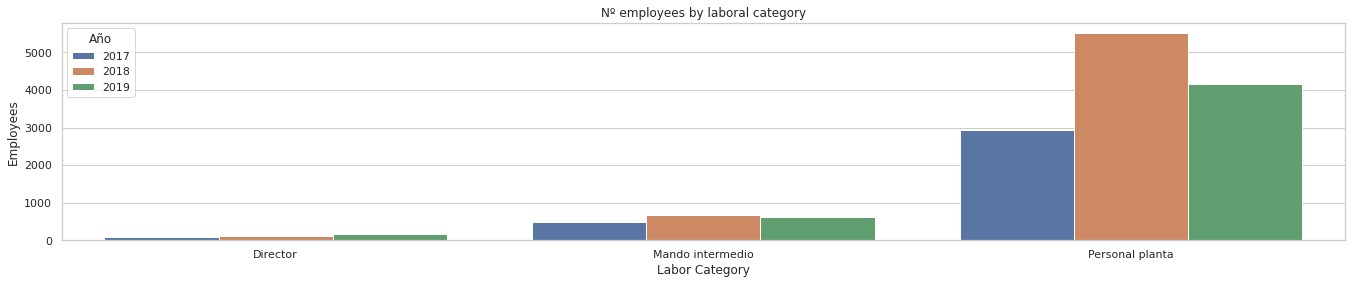

In [179]:
plt.figure(figsize=(23,4))

ax = sns.barplot(x="Categoria_laboral", y="Total",hue='Año', data = int_empl_category)
ax.set_title('Nº employees by laboral category')
ax.set(xlabel='Labor Category', ylabel='Employees')

### Trainning hours

In [180]:
h_formacion = h_formacion.groupby('Año').agg('sum')
h_formacion = h_formacion.reset_index()
h_formacion['Año']=h_formacion['Año'].astype(str)
h_formacion.head()

,Año,Horas formacion
0,2017,155515
1,2018,205453
2,2019,216862


As we can see in the chart below, the company has been investing in training among the last years.

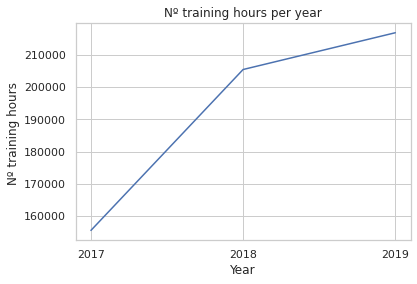

In [181]:
plt.plot(h_formacion['Año'], h_formacion['Horas formacion'])
plt.title('Nº training hours per year')
plt.xlabel('Year')
plt.ylabel('Nº training hours ')

plt.show()